In [1]:
import pandas as pd 
import re
df = pd.read_csv('/home/phani/cord-19_2020-04-10/2020-04-10/metadata.csv')

In [3]:
df.shape

(51078, 18)

In [4]:
#selecting specific columns
##these include the title of the article, its abstract, date, link to the article, and authors
journels = df[['title', 'abstract', 'publish_time', 'url', 'authors']]
journels.head()

,title,abstract,publish_time,url,authors
0,Airborne rhinovirus detection and effect of ul...,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"Myatt, Theodore A; Johnston, Sebastian L; Rudn..."
1,Discovering human history from stomach bacteria,Recent analyses of human pathogens have reveal...,2003-04-28,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"Disotell, Todd R"
2,A new recruit for the army of the men of death,"The army of the men of death, in John Bunyan's...",2003-06-27,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"Petsko, Gregory A"
3,Association of HLA class I with severe acute r...,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean..."
4,A double epidemic model for the SARS propagation,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine"


In [7]:
##ABSTRACTS
#separate each word in the ABSTRACT column
journels['words'] = journels.abstract.str.strip().str.split('[\W_]+')
journels['words'].head()

<ipython-input-7-464869a7c955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  journels['words'] = journels.abstract.str.strip().str.split('[\W_]+')


0    [BACKGROUND, Rhinovirus, the, most, common, ca...
1    [Recent, analyses, of, human, pathogens, have,...
2    [The, army, of, the, men, of, death, in, John,...
3    [BACKGROUND, The, human, leukocyte, antigen, H...
4    [BACKGROUND, An, epidemic, of, a, Severe, Acut...
Name: words, dtype: object

In [8]:
#separate words in the abstract column and create a new column
abstracts = journels[journels.words.str.len() > 0]

In [9]:
# saving the dataframe 
abstracts.to_csv('Journal_Abrstracts.csv') 

In [10]:
#display dataframe
abstracts.head(3)

,title,abstract,publish_time,url,authors,words
0,Airborne rhinovirus detection and effect of ul...,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...","[BACKGROUND, Rhinovirus, the, most, common, ca..."
1,Discovering human history from stomach bacteria,Recent analyses of human pathogens have reveal...,2003-04-28,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"Disotell, Todd R","[Recent, analyses, of, human, pathogens, have,..."
2,A new recruit for the army of the men of death,"The army of the men of death, in John Bunyan's...",2003-06-27,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"Petsko, Gregory A","[The, army, of, the, men, of, death, in, John,..."


In [11]:
abstracts.shape


(42352, 6)

# BROWSING THE ABSTRACTS FOR ANSWERS
Related to modes of communicating with target high-risk populations (elderly, health care workers).

In [12]:
#looking for abstracts with specific terms among publications
#in the dataset provided by Kaggle

Q1A=abstracts[abstracts['abstract'].str.contains('communicating')]

Q1B=abstracts[abstracts['abstract'].str.contains('with high-risk')]

Q1C=abstracts[abstracts['abstract'].str.contains('contacting')]

Q1D=abstracts[abstracts['abstract'].str.contains('elderly')]

Q1F=abstracts[abstracts['abstract'].str.contains('health care workers')]

Q1E=abstracts[abstracts['abstract'].str.contains('risk population')]

In [13]:
# Concatenating the dataframes into one table per question
Question1= pd.concat([Q1A, Q1B, Q1C, Q1D, Q1E, Q1F])

# dropping null value columns to avoid errors 
Question1.dropna(inplace = True) 

In [14]:
Question1.shape

(721, 6)

In [19]:
#Relevant articles in the dataset to Q1
print("modes of communicating with target high-risk populations (elderly, health care workers")
print()
Question1.head()

modes of communicating with target high-risk populations (elderly, health care workers



,title,abstract,publish_time,url,authors,words
192,The Internet as a Vehicle to Communicate Healt...,BACKGROUND: The recent public health risks ari...,2004-03-03,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"Kittler, Anne F; Hobbs, John; Volk, Lynn A; Kr...","[BACKGROUND, The, recent, public, health, risk..."
193,What Internet Services Would Patients Like Fro...,BACKGROUND: International health organizations...,2005-08-03,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,"Rizo, Carlos A; Lupea, Doina; Baybourdy, Homay...","[BACKGROUND, International, health, organizati..."
1349,Travel and migration associated infectious dis...,BACKGROUND: Europeans represent the majority o...,2010-11-17,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,"Field, Vanessa; Gautret, Philippe; Schlagenhau...","[BACKGROUND, Europeans, represent, the, majori..."
1508,Communicating uncertainty - how Australian tel...,BACKGROUND: Health officials face particular c...,2011-03-24,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,"Fogarty, Andrea S; Holland, Kate; Imison, Mich...","[BACKGROUND, Health, officials, face, particul..."
8322,A mechanistic spatio-temporal framework for mo...,In recent years there has been growing availab...,2017-10-30,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,"Lau, Max S. Y.; Gibson, Gavin J.; Adrakey, Hol...","[In, recent, years, there, has, been, growing,..."


In [28]:
x1 = Question1.url.count()
x1

721

In [21]:
#686 articles identified for QUESTION 1
## Saved as CSV file
Question1.to_csv('Q1_articles_Ways_of_communicating_with_highrisk_pop.csv')

Management of patients who are underhoused or otherwise lower socioeconomic status.

In [22]:
##Term: homeless
Q2a=abstracts[abstracts['abstract'].str.contains('homeless')]

Q2b=abstracts[abstracts['abstract'].str.contains('low income')]

#Q2c=abstracts[abstracts['abstract'].str.contains('poverty')]

Q2c=abstracts[abstracts['abstract'].str.contains('housing')]

In [24]:
# Concatenating the dataframes into one table per question
Question2= pd.concat([Q2a,Q2b,Q2c])
# dropping null value columns to avoid errors 
Question2.dropna(inplace = True) 

Question2.shape

(139, 6)

In [29]:
x2 = Question2.url.count()
x2

139

In [30]:
# saving the dataframe of ARTICLES related to Q2
#Question2.to_csv('Q2_Mangmnt_underhoused_or_low_income_patients.csv')

What are ways to create hospital infrastructure to prevent nosocomial outbreaks and protect uninfected patients?

In [31]:
q3a=abstracts[abstracts['abstract'].str.contains('hospital spread')]
q3b=abstracts[abstracts['abstract'].str.contains('hospital patients')]
q3c=abstracts[abstracts['abstract'].str.contains('nosocomial outbreak')]

# Concatenating the dataframes into one table per question
Q3= pd.concat([q3a,q3b,q3c])
# dropping null value columns to avoid errors 
Q3.dropna(inplace = True) 

Q3.shape

(73, 6)

In [33]:
x3 = Q3.url.count()
x3

73

What are methods to control the spread in communities, barriers to compliance

In [34]:
##Term: compliance
q4A=abstracts[abstracts['abstract'].str.contains('compliance')]

q4B=abstracts[abstracts['abstract'].str.contains('community spread')]

q4C=abstracts[abstracts['abstract'].str.contains('prevent spread')]

q4D=abstracts[abstracts['abstract'].str.contains('methods to prevent')]

# Concatenating the dataframes into one table per question
Question4= pd.concat([q4A,q4B,q4C, q4D])
# dropping null value columns to avoid errors 
Question4.dropna(inplace = True) 

Question4.shape

(278, 6)

In [41]:
x4 = Question4.url.count()
x4

278

 What are recommendations for combating/overcoming resource failures

In [37]:
q5a=abstracts[abstracts['abstract'].str.contains('not reach')]

q5b=abstracts[abstracts['abstract'].str.contains('improve access')]

q5c=abstracts[abstracts['abstract'].str.contains('access to resource')]

q5d=abstracts[abstracts['abstract'].str.contains('outreach')]

q5e=abstracts[abstracts['abstract'].str.contains('faulty')]

q5f=abstracts[abstracts['abstract'].str.contains('meet demand')]

q5g=abstracts[abstracts['abstract'].str.contains('waste')]

In [38]:
# Concatenating the dataframes into one table per question
Question5= pd.concat([q5a,q5b,q5c, q5d, q5e, q5f, q5g])
# dropping null value columns to avoid errors 
Question5.dropna(inplace = True) 

Question5.shape

(239, 6)

In [40]:
x5 = Question5.url.count()
x5

239

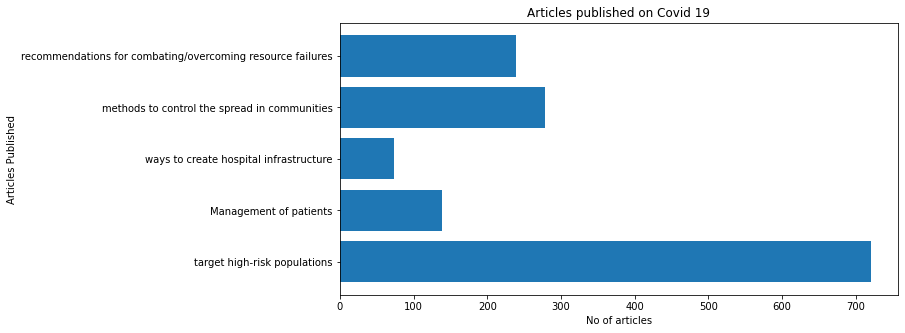

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns 
categories = ['target high-risk populations', 'Management of patients', 'ways to create hospital infrastructure',
             'methods to control the spread in communities', 'recommendations for combating/overcoming resource failures']
data = [x1,x2,x3,x4,x5]


fig = plt.figure(figsize = (10, 5)) 
plt.barh(categories, data) 
plt.xlabel("No of articles") 
plt.ylabel("Articles Published")
plt.title("Articles published on Covid 19") 
plt.show() 